In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras

In [2]:
df = pd.read_csv('data.csv')

In [4]:
df.head(20)

,timestep_time,vehicle_0,vehicle_1,vehicle_10,vehicle_11,vehicle_12,vehicle_13,vehicle_14,vehicle_15,vehicle_16,...,vehicle_18,vehicle_19,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_6,vehicle_7,vehicle_8,vehicle_9
0,100.0,12.84,9.42,11.74,12.81,11.99,7.00,11.71,4.61,4.10,...,10.97,12.89,11.85,12.66,10.04,13.69,11.17,12.75,7.41,13.19
1,101.0,12.91,9.14,12.49,12.80,10.87,7.00,11.30,4.30,3.81,...,10.83,12.50,10.96,12.31,9.93,13.14,11.73,11.99,8.27,13.90
2,102.0,12.89,9.49,12.74,13.11,11.41,6.43,11.05,5.10,3.46,...,11.83,11.73,11.18,12.64,9.99,12.84,11.11,11.87,7.40,13.02
3,103.0,13.45,8.37,11.98,13.16,11.94,6.27,11.38,4.26,3.34,...,11.89,12.85,10.83,12.05,9.58,13.31,12.06,11.78,7.94,13.97
4,104.0,13.86,8.30,12.98,12.80,11.99,7.08,11.22,4.07,3.09,...,11.03,12.93,11.19,12.14,10.24,12.73,11.16,11.81,7.62,13.77
5,105.0,13.56,8.64,12.28,13.72,11.85,6.75,11.48,4.39,3.76,...,11.02,12.77,11.77,12.35,9.89,12.89,10.88,12.59,8.23,13.41
6,106.0,13.32,9.24,12.00,13.67,11.70,6.39,11.36,4.58,2.91,...,11.74,12.37,11.80,12.67,9.45,12.94,11.78,12.50,7.40,13.78
7,107.0,12.91,9.20,12.27,13.86,11.50,6.28,11.22,4.05,4.05,...,11.85,12.38,11.58,12.08,9.83,13.33,11.75,11.73,7.79,12.71
8,108.0,13.68,9.51,12.11,12.85,11.11,6.51,11.60,4.52,3.48,...,10.96,12.28,11.17,12.25,8.72,13.92,11.22,12.00,7.56,13.34
9,109.0,13.11,8.41,11.88,13.12,10.81,6.72,11.87,4.63,3.15,...,11.34,12.23,11.08,12.59,10.15,13.14,11.87,12.23,7.48,13.22


In [5]:
df.drop(columns=['timestep_time'], axis=1, inplace=True)

In [6]:
df

,vehicle_0,vehicle_1,vehicle_10,vehicle_11,vehicle_12,vehicle_13,vehicle_14,vehicle_15,vehicle_16,vehicle_17,vehicle_18,vehicle_19,vehicle_2,vehicle_3,vehicle_4,vehicle_5,vehicle_6,vehicle_7,vehicle_8,vehicle_9
0,12.84,9.42,11.74,12.81,11.99,7.00,11.71,4.61,4.10,3.16,10.97,12.89,11.85,12.66,10.04,13.69,11.17,12.75,7.41,13.19
1,12.91,9.14,12.49,12.80,10.87,7.00,11.30,4.30,3.81,2.99,10.83,12.50,10.96,12.31,9.93,13.14,11.73,11.99,8.27,13.90
2,12.89,9.49,12.74,13.11,11.41,6.43,11.05,5.10,3.46,3.45,11.83,11.73,11.18,12.64,9.99,12.84,11.11,11.87,7.40,13.02
3,13.45,8.37,11.98,13.16,11.94,6.27,11.38,4.26,3.34,4.02,11.89,12.85,10.83,12.05,9.58,13.31,12.06,11.78,7.94,13.97
4,13.86,8.30,12.98,12.80,11.99,7.08,11.22,4.07,3.09,3.24,11.03,12.93,11.19,12.14,10.24,12.73,11.16,11.81,7.62,13.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,12.80,8.37,11.77,13.49,11.75,6.90,10.91,4.38,4.12,2.90,11.09,12.89,11.01,12.59,9.39,12.89,11.50,12.02,8.67,13.94
1396,13.59,9.19,12.76,13.05,11.26,6.41,11.44,5.17,3.81,3.30,9.79,11.89,11.41,12.94,9.84,12.75,11.37,12.77,8.40,13.62
1397,13.04,9.43,12.36,13.57,11.60,6.28,11.33,4.17,3.46,3.98,10.84,11.84,11.51,12.48,10.44,13.72,11.18,12.09,8.46,13.20
1398,13.67,9.19,12.27,13.24,11.17,6.96,10.77,4.15,3.54,3.95,10.88,12.87,11.63,12.89,9.56,13.05,11.55,12.29,8.25,13.62


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_0,1400.0,13.348757,0.375046,12.70,13.0300,13.340,13.6800,14.00
vehicle_1,1400.0,8.868500,0.378103,8.01,8.5300,8.900,9.1900,9.52
vehicle_10,1400.0,12.329486,0.369607,10.92,12.0100,12.320,12.6400,13.00
vehicle_11,1400.0,13.339271,0.377056,12.70,13.0100,13.335,13.6700,14.00
vehicle_12,1400.0,11.358564,0.373855,10.49,11.0600,11.370,11.6800,12.00
vehicle_13,1400.0,6.540300,0.375434,5.44,6.2200,6.540,6.8625,7.18
vehicle_14,1400.0,11.355479,0.375814,10.70,11.0300,11.360,11.6700,12.00
vehicle_15,1400.0,4.697221,0.378865,4.05,4.3700,4.680,5.0300,5.35
vehicle_16,1400.0,3.483036,0.372012,2.82,3.1600,3.490,3.8000,4.12
vehicle_17,1400.0,3.438271,0.371565,2.78,3.1300,3.450,3.7600,4.08


In [8]:
from sklearn.preprocessing import Normalizer
import pandas as pd
from typing import List

class VectorNormalizer:
    """
    provided methods to fit, transform and inverse transform 2-D arrays 
    transformation applied: x/ L2 norm of X =>
    """
    def __init__(self) -> None:
        """
        intialize attributes
        """
        self.norms = []
        self.inverse_transformed = []
        self.transformed = []

    def fit(self, dataframe) -> List[int]:
        """
        calculates norms of all row vectors in the dataframe

        returns: list of norms
        """
        for item in dataframe.to_numpy():
            self.norms.append(np.sqrt(np.sum(np.square(item))))
        
        return self.norms

    def transform(self, dataframe) -> pd.DataFrame():
        """
        performs vector normalization

        returns: original dataframe after normalization
        """        
        for idx, item in enumerate(dataframe.to_numpy()):
            self.transformed.append(item/self.norms[idx])
        
        return pd.DataFrame(self.transformed)


    def inverse_transform(self, inverse_transformed_df) -> pd.DataFrame():
        """
        calculates product of norms of all row vectors with row vectors in the dataframe

        returns: original dataframe after transformations
        
        """
        for idx, item in enumerate(inverse_transformed_df.to_numpy()):
            self.inverse_transformed.append(item * self.norms[idx])
        
        return pd.DataFrame(self.inverse_transformed)


scaler = VectorNormalizer()
norms = scaler.fit(df)   

In [9]:
scale=VectorNormalizer()
scale.fit(df)
df_scale_speed=scale.transform(df)

In [10]:
df_scale_speed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.266284,0.195358,0.243472,0.265662,0.248657,0.145171,0.242850,0.095605,0.085029,0.065534,0.227503,0.267321,0.245753,0.262552,0.208216,0.283912,0.231651,0.264418,0.153674,0.273543
1,0.271189,0.191996,0.262366,0.268878,0.228336,0.147043,0.237369,0.090326,0.080033,0.062808,0.227496,0.262576,0.230227,0.258585,0.208591,0.276020,0.246401,0.251863,0.173720,0.291985
2,0.271776,0.200089,0.268613,0.276414,0.240571,0.135572,0.232981,0.107530,0.072951,0.072741,0.249427,0.247318,0.235722,0.266505,0.210632,0.270722,0.234246,0.250270,0.156023,0.274517
3,0.280157,0.174343,0.249538,0.274116,0.248704,0.130601,0.237040,0.088734,0.069571,0.083735,0.247663,0.267659,0.225584,0.250996,0.199547,0.277241,0.251204,0.245372,0.165386,0.290988
4,0.289647,0.173454,0.271257,0.267495,0.250568,0.147958,0.234476,0.085055,0.064575,0.067710,0.230506,0.270212,0.233849,0.253703,0.213996,0.266033,0.233223,0.246806,0.159243,0.287767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.268473,0.175556,0.246870,0.282946,0.246450,0.144724,0.228832,0.091868,0.086415,0.060826,0.232607,0.270361,0.230929,0.264069,0.196950,0.270361,0.241207,0.252113,0.181849,0.292384
1396,0.283630,0.191800,0.266308,0.272360,0.235002,0.133780,0.238759,0.107901,0.079517,0.068873,0.204322,0.248150,0.238133,0.270064,0.205366,0.266099,0.237298,0.266516,0.175312,0.284256
1397,0.271692,0.196476,0.257524,0.282734,0.241689,0.130845,0.236063,0.086883,0.072090,0.082924,0.225854,0.246689,0.239814,0.260024,0.217520,0.285860,0.232938,0.251898,0.176266,0.275025
1398,0.284000,0.190926,0.254914,0.275066,0.232061,0.144597,0.223751,0.086218,0.073545,0.082063,0.226036,0.267380,0.241618,0.267795,0.198613,0.271119,0.239956,0.255330,0.171397,0.282961


In [11]:
car_1 = df_scale_speed.loc[:, 0]
car_2 = df_scale_speed.loc[:, 1]
car_3 = df_scale_speed.loc[:, 2]
car_4 = df_scale_speed.loc[:, 3]
car_5 = df_scale_speed.loc[:, 4]
car_6 = df_scale_speed.loc[:, 5]
car_7 = df_scale_speed.loc[:, 6]
car_8 = df_scale_speed.loc[:, 7]
car_9 = df_scale_speed.loc[:, 8]
car_10 = df_scale_speed.loc[:, 9]
car_11 = df_scale_speed.loc[:, 10]
car_12 = df_scale_speed.loc[:, 11]
car_13 = df_scale_speed.loc[:, 12]
car_14 = df_scale_speed.loc[:, 13]
car_15 = df_scale_speed.loc[:, 14]
car_16 = df_scale_speed.loc[:, 15]
car_17 = df_scale_speed.loc[:, 16]
car_18 = df_scale_speed.loc[:, 17]
car_19 = df_scale_speed.loc[:, 18]
car_20 = df_scale_speed.loc[:, 19]

In [12]:
# speed
# splitting train/test data
train_car1 = car_1.iloc[:1200]
test_car1 = car_1.iloc[1200:]

train_car2 = car_2.iloc[:1200]
test_car2 = car_2.iloc[1200:]

train_car3 = car_3.iloc[:1200]
test_car3 = car_3.iloc[1200:]

train_car4 = car_4.iloc[:1200]
test_car4 = car_4.iloc[1200:]

train_car5 = car_5.iloc[:1200]
test_car5 = car_5.iloc[1200:]

train_car6 = car_6.iloc[:1200]
test_car6 = car_6.iloc[1200:]

train_car7 = car_7.iloc[:1200]
test_car7 = car_7.iloc[1200:]

train_car8 = car_8.iloc[:1200]
test_car8 = car_8.iloc[1200:]

train_car9 = car_9.iloc[:1200]
test_car9 = car_9.iloc[1200:]

train_car10 = car_10.iloc[:1200]
test_car10 = car_10.iloc[1200:]

train_car11 = car_11.iloc[:1200]
test_car11 = car_11.iloc[1200:]

train_car12 = car_12.iloc[:1200]
test_car12 = car_12.iloc[1200:]

train_car13 = car_13.iloc[:1200]
test_car13= car_13.iloc[1200:]

train_car14 = car_14.iloc[:1200]
test_car14 = car_14.iloc[1200:]

train_car14 = car_14.iloc[:1200]
test_car14 = car_14.iloc[1200:]

train_car15 = car_15.iloc[:1200]
test_car15 = car_15.iloc[1200:]

train_car16 = car_16.iloc[:1200]
test_car16 = car_16.iloc[1200:]

train_car17 = car_17.iloc[:1200]
test_car17 = car_17.iloc[1200:]

train_car18 = car_18.iloc[:1200]
test_car18 = car_18.iloc[1200:]

train_car19 = car_19.iloc[:1200]
test_car19 = car_19.iloc[1200:]

train_car20 = car_20.iloc[:1200]
test_car20 = car_20.iloc[1200:]





In [13]:
def create_dataset(data, steps):
  features, labels = [], []
  for i in range(len(data)-steps):
    data_seq = data[i: i+steps]
    features.append(data_seq)

    seq_label = data[i+steps]
    labels.append(seq_label)

  return np.array(features), np.array(labels)

In [27]:
# speed
TIME_STEPS = 4

train_features_speed1, train_labels_speed1 = create_dataset(train_car1.to_numpy(), TIME_STEPS)
test_features_speed1, test_labels_speed1 = create_dataset(test_car1.to_numpy(), TIME_STEPS)

train_features_speed2, train_labels_speed2 = create_dataset(train_car2.to_numpy(), TIME_STEPS)
test_features_speed2, test_labels_speed2 = create_dataset(test_car2.to_numpy(), TIME_STEPS)

train_features_speed3, train_labels_speed3 = create_dataset(train_car3.to_numpy(), TIME_STEPS)
test_features_speed3, test_labels_speed3 = create_dataset(test_car3.to_numpy(), TIME_STEPS)

train_features_speed4, train_labels_speed4 = create_dataset(train_car4.to_numpy(), TIME_STEPS)
test_features_speed4, test_labels_speed4 = create_dataset(test_car4.to_numpy(), TIME_STEPS)

train_features_speed5, train_labels_speed5 = create_dataset(train_car5.to_numpy(), TIME_STEPS)
test_features_speed5, test_labels_speed5 = create_dataset(test_car5.to_numpy(), TIME_STEPS)

train_features_speed6, train_labels_speed6 = create_dataset(train_car6.to_numpy(), TIME_STEPS)
test_features_speed6, test_labels_speed6 = create_dataset(test_car6.to_numpy(), TIME_STEPS)

train_features_speed7, train_labels_speed7 = create_dataset(train_car7.to_numpy(), TIME_STEPS)
test_features_speed7, test_labels_speed7 = create_dataset(test_car7.to_numpy(), TIME_STEPS)

train_features_speed8, train_labels_speed8 = create_dataset(train_car8.to_numpy(), TIME_STEPS)
test_features_speed8, test_labels_speed8 = create_dataset(test_car8.to_numpy(), TIME_STEPS)

train_features_speed9, train_labels_speed9 = create_dataset(train_car9.to_numpy(), TIME_STEPS)
test_features_speed9, test_labels_speed9 = create_dataset(test_car9.to_numpy(), TIME_STEPS)

train_features_speed10, train_labels_speed10 = create_dataset(train_car10.to_numpy(), TIME_STEPS)
test_features_speed10, test_labels_speed10 = create_dataset(test_car10.to_numpy(), TIME_STEPS)

train_features_speed11, train_labels_speed11 = create_dataset(train_car11.to_numpy(), TIME_STEPS)
test_features_speed11, test_labels_speed11 = create_dataset(test_car11.to_numpy(), TIME_STEPS)

train_features_speed12, train_labels_speed12 = create_dataset(train_car12.to_numpy(), TIME_STEPS)
test_features_speed12, test_labels_speed12 = create_dataset(test_car12.to_numpy(), TIME_STEPS)

train_features_speed13, train_labels_speed13 = create_dataset(train_car13.to_numpy(), TIME_STEPS)
test_features_speed13, test_labels_speed13 = create_dataset(test_car13.to_numpy(), TIME_STEPS)

train_features_speed14, train_labels_speed14 = create_dataset(train_car14.to_numpy(), TIME_STEPS)
test_features_speed14, test_labels_speed14 = create_dataset(test_car14.to_numpy(), TIME_STEPS)

train_features_speed15, train_labels_speed15 = create_dataset(train_car15.to_numpy(), TIME_STEPS)
test_features_speed15, test_labels_speed15 = create_dataset(test_car15.to_numpy(), TIME_STEPS)

train_features_speed16, train_labels_speed16 = create_dataset(train_car16.to_numpy(), TIME_STEPS)
test_features_speed16, test_labels_speed16 = create_dataset(test_car16.to_numpy(), TIME_STEPS)

train_features_speed1, train_labels_speed1 = create_dataset(train_car17.to_numpy(), TIME_STEPS)
test_features_speed1, test_labels_speed1 = create_dataset(test_car17.to_numpy(), TIME_STEPS)

train_features_speed1, train_labels_speed1 = create_dataset(train_car18.to_numpy(), TIME_STEPS)
test_features_speed1, test_labels_speed1 = create_dataset(test_car18.to_numpy(), TIME_STEPS)

train_features_speed17, train_labels_speed17 = create_dataset(train_car19.to_numpy(), TIME_STEPS)
test_features_speed17, test_labels_speed17 = create_dataset(test_car19.to_numpy(), TIME_STEPS)

train_features_speed18, train_labels_speed18 = create_dataset(train_car20.to_numpy(), TIME_STEPS)
test_features_speed18, test_labels_speed18 = create_dataset(test_car20.to_numpy(), TIME_STEPS)

train_features_speed19, train_labels_speed19 = create_dataset(train_car1.to_numpy(), TIME_STEPS)
test_features_speed19, test_labels_speed19 = create_dataset(test_car1.to_numpy(), TIME_STEPS)

train_features_speed20, train_labels_speed20 = create_dataset(train_car1.to_numpy(), TIME_STEPS)
test_features_speed20, test_labels_speed20 = create_dataset(test_car1.to_numpy(), TIME_STEPS)


In [28]:
print(train_features_speed20.shape)
print(test_features_speed20.shape)
print(train_labels_speed20.shape)
print(test_labels_speed20.shape)

(1196, 4)
(196, 4)
(1196,)
(196,)


In [30]:

train_features_speed1=train_features_speed1.reshape(1196, 4,1)
test_features_speed1=test_features_speed1.reshape(196, 4,1)

train_features_speed2=train_features_speed2.reshape(1196, 4,1)
test_features_speed2=test_features_speed2.reshape(196, 4,1)

train_features_speed3=train_features_speed3.reshape(1196, 4,1)
test_features_speed3=test_features_speed3.reshape(196, 4,1)

train_features_speed4=train_features_speed4.reshape(1196, 4,1)
test_features_speed4=test_features_speed4.reshape(196, 4,1)

train_features_speed5=train_features_speed5.reshape(1196, 4,1)
test_features_speed5=test_features_speed5.reshape(196, 4,1)

train_features_speed6=train_features_speed6.reshape(1196, 4,1)
test_features_speed6=test_features_speed6.reshape(196, 4,1)

train_features_speed7=train_features_speed7.reshape(1196, 4,1)
test_features_speed7=test_features_speed7.reshape(196, 4,1)

train_features_speed8=train_features_speed8.reshape(1196, 4,1)
test_features_speed8=test_features_speed8.reshape(196, 4,1)

train_features_speed9=train_features_speed9.reshape(1196, 4,1)
test_features_speed9=test_features_speed9.reshape(196, 4,1)

train_features_speed10=train_features_speed10.reshape(1196, 4,1)
test_features_speed10=test_features_speed10.reshape(196, 4,1)

train_features_speed11=train_features_speed11.reshape(1196, 4,1)
test_features_speed11=test_features_speed11.reshape(196, 4,1)

train_features_speed12=train_features_speed12.reshape(1196, 4,1)
test_features_speed12=test_features_speed12.reshape(196, 4,1)

train_features_speed13=train_features_speed13.reshape(1196, 4,1)
test_features_speed13=test_features_speed13.reshape(196, 4,1)

train_features_speed14=train_features_speed14.reshape(1196, 4,1)
test_features_speed14=test_features_speed14.reshape(196, 4,1)

train_features_speed15=train_features_speed15.reshape(1196, 4,1)
test_features_speed15=test_features_speed15.reshape(196, 4,1)

train_features_speed16=train_features_speed16.reshape(1196, 4,1)
test_features_speed16=test_features_speed16.reshape(196, 4,1)

train_features_speed17=train_features_speed17.reshape(1196, 4,1)
test_features_speed17=test_features_speed17.reshape(196, 4,1)

train_features_speed18=train_features_speed18.reshape(1196, 4,1)
test_features_speed18=test_features_speed18.reshape(196, 4,1)

train_features_speed19=train_features_speed19.reshape(1196, 4,1)
test_features_speed19=test_features_speed19.reshape(196, 4,1)

train_features_speed20=train_features_speed20.reshape(1196, 4,1)
test_features_speed20=test_features_speed20.reshape(196, 4,1)


In [37]:
from tensorflow.keras.backend import dropout
model_s1 = tensorflow.keras.models.Sequential()
model_s1.add(tensorflow.keras.layers.LSTM(18, input_shape=(4,1),return_sequences=True) )
model_s1.add(tensorflow.keras.layers.LSTM(9))
model_s1.add(tensorflow.keras.layers.Dense(1))

model_s1.compile(optimizer='adam', loss=['mse'])



In [38]:
# fitting model for speed
history_s1 = model_s1.fit(train_features_speed1, train_labels_speed1, batch_size=64, epochs=50, shuffle=False, validation_split=.15)


Epoch 1/50
16/16 [==============================] - 9s 141ms/step - loss: 0.0472 - val_loss: 0.0157
Epoch 2/50
16/16 [==============================] - 1s 48ms/step - loss: 0.0099 - val_loss: 5.8793e-05
Epoch 3/50
16/16 [==============================] - 1s 47ms/step - loss: 4.2752e-04 - val_loss: 4.8146e-04
Epoch 4/50
16/16 [==============================] - 1s 45ms/step - loss: 2.3184e-04 - val_loss: 1.2003e-04
Epoch 5/50
16/16 [==============================] - 1s 47ms/step - loss: 1.2627e-04 - val_loss: 5.8768e-05
Epoch 6/50
16/16 [==============================] - 1s 51ms/step - loss: 6.5104e-05 - val_loss: 6.3079e-05
Epoch 7/50
16/16 [==============================] - 1s 53ms/step - loss: 6.2238e-05 - val_loss: 5.8937e-05
Epoch 8/50
16/16 [==============================] - 1s 50ms/step - loss: 6.3184e-05 - val_loss: 5.9151e-05
Epoch 9/50
16/16 [==============================] - 1s 50ms/step - loss: 6.2125e-05 - val_loss: 5.8908e-05
Epoch 10/50
16/16 [=============================

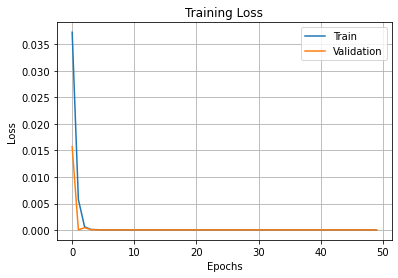

In [39]:
# speed
plt.plot(history_s1.history['loss'], label='Train')
plt.plot(history_s1.history['val_loss'], label='Validation')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [40]:
# speed
# predicting on test data
prediction_speed1 = model_s1.predict(test_features_speed1)
prediction_speed1

array([[0.25742972],
       [0.25884882],
       [0.25830147],
       [0.25898507],
       [0.25899452],
       [0.2578211 ],
       [0.25824374],
       [0.25659075],
       [0.2576167 ],
       [0.25738898],
       [0.25855285],
       [0.25966746],
       [0.25875995],
       [0.26035866],
       [0.25912607],
       [0.257736  ],
       [0.25740337],
       [0.25634098],
       [0.25716987],
       [0.2590559 ],
       [0.25968882],
       [0.25999   ],
       [0.25939122],
       [0.2587607 ],
       [0.25777802],
       [0.25770554],
       [0.2581037 ],
       [0.25715926],
       [0.25768963],
       [0.25768334],
       [0.25677443],
       [0.25699526],
       [0.2573801 ],
       [0.25897998],
       [0.25837976],
       [0.2589313 ],
       [0.25774258],
       [0.25646165],
       [0.25680286],
       [0.2567247 ],
       [0.25757346],
       [0.25758752],
       [0.25661522],
       [0.25709108],
       [0.2569029 ],
       [0.25734493],
       [0.2584447 ],
       [0.257

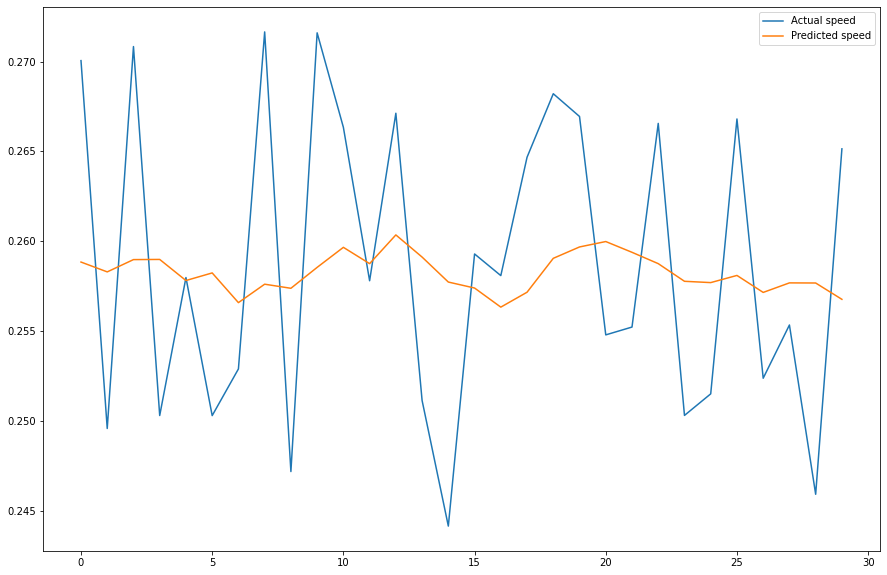

In [56]:
# speed graph with test labels
plt.figure(figsize=(15,10))
plt.plot(test_labels_speed1[:30], label='Actual speed')
plt.plot(prediction_speed1[1:31], label='Predicted speed')
plt.legend()

In [107]:
print(test_features_speed1[-1])
print(test_labels_speed1[-1])

[[0.26847336]
 [0.28363025]
 [0.27169173]
 [0.28399985]]
0.28112151034965355


In [104]:
car_1[-10:-1]

1390    0.278521
1391    0.278276
1392    0.268758
1393    0.283962
1394    0.266908
1395    0.268473
1396    0.283630
1397    0.271692
1398    0.284000
Name: 0, dtype: float64

In [51]:
# alteration
test_s1=prediction_speed1
test_s1


array([[0.25742972],
       [0.25884882],
       [0.25830147],
       [0.25898507],
       [0.25899452],
       [0.2578211 ],
       [0.25824374],
       [0.25659075],
       [0.2576167 ],
       [0.25738898],
       [0.25855285],
       [0.25966746],
       [0.25875995],
       [0.26035866],
       [0.25912607],
       [0.257736  ],
       [0.25740337],
       [0.25634098],
       [0.25716987],
       [0.2590559 ],
       [0.25968882],
       [0.25999   ],
       [0.25939122],
       [0.2587607 ],
       [0.25777802],
       [0.25770554],
       [0.2581037 ],
       [0.25715926],
       [0.25768963],
       [0.25768334],
       [0.25677443],
       [0.25699526],
       [0.2573801 ],
       [0.25897998],
       [0.25837976],
       [0.2589313 ],
       [0.25774258],
       [0.25646165],
       [0.25680286],
       [0.2567247 ],
       [0.25757346],
       [0.25758752],
       [0.25661522],
       [0.25709108],
       [0.2569029 ],
       [0.25734493],
       [0.2584447 ],
       [0.257

In [53]:
test_s1=test_s1*1.1